# Introduction

   Firstly I want to say that I am playing LoL for 5 years and the first time I see this data I said to myself that I should analys this data. In this data I just tried to predict win chance of the blue team according to their inputs.I've shocked beacuse of the thruth that there is no any correlation between win and number of wards you placed or destroyed. I talked about it in Wins -- WardsDestroyed part under Visualization part. Finally, I am actually happy to work on two things that I'm loving to do. 

1. [Entering and Seperating Data](#1)
1. [Visualization](#2)
     * [Wins -- Kills](#10)
     * [Wins -- AvgLevel](#11)
     * [Wins -- Deaths](#12)
     * [Wins -- FirstBlood](#13)
     * [Wins -- EliteMonsters](#14)
     * [Wins -- Dragons](#15)
     * [Wins -- Heralds](#16)
     * [Wins -- Assists](#17)
     * [Wins -- TowersDestroyed](#18)
     * [Wins -- RoundedCSPerMin](#19)
     * [Wins -- WardsPlaced](#20)
     * [Wins -- WardsDestroyed](#21)
     * [Wins -- TotalGold](#22)
     * [Wins -- TotalExperience](#23)
     * [Wins -- GoldPerMin](#24)
     * [Wins -- ExperienceDiff](#25)
1. [Outlier Detection](#40)
1. [Feature Engineering](#3)
     * [Wins -- Kills](#26)
     * [Wins -- AvgLevel](#27)
     * [Wins -- Deaths](#28)
     * [Wins -- FirstBlood](#29)
     * [Wins -- EliteMonsters](#30)
     * [Wins -- Dragons](#31)
     * [Wins -- Heralds](#32)
     * [Wins -- Assists](#33)
     * [Wins -- TowersDestroyed](#34)
     * [Wins -- RoundedCSPerMin](#35)
     * [Wins -- TotalGold](#36)
     * [Wins -- TotalExperience](#37)
     * [Wins -- GoldPerMin](#38)
     * [Wins -- ExperienceDiff](#39)
1. [Drop Other Elements](#4)
1. [Modelling](#5)
     * [Train Test Split](#6)
     * [Simple Logistic Regression](#7)
     * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#8)
     * [Ensemble Modelling](#9)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv


<a id="1"></a><br>
# Entering and Seperating Data

In [2]:
data=pd.read_csv("/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv")

In [3]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
data.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [5]:
id_list=["Wins","WardsPlaced","WardsDestroyed","FirstBlood","Kills","Deaths","Assists","EliteMonsters","Dragons","Heralds","TowersDestroyed","TotalGold","AvgLevel","TotalExperience","TotalMinionsKilled","TotalJungleMinionsKilled","GoldDiff","ExperienceDiff","CSPerMin","GoldPerMin"]
blue_data=[]
blue_data=pd.DataFrame(blue_data)
for i in id_list:
    blue_data[i]=data["blue"+i]

In [6]:
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Kills,Deaths,Assists,EliteMonsters,Dragons,Heralds,TowersDestroyed,TotalGold,AvgLevel,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,GoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [7]:
id_list=id_list[1:]

In [8]:
print(id_list)

['WardsPlaced', 'WardsDestroyed', 'FirstBlood', 'Kills', 'Deaths', 'Assists', 'EliteMonsters', 'Dragons', 'Heralds', 'TowersDestroyed', 'TotalGold', 'AvgLevel', 'TotalExperience', 'TotalMinionsKilled', 'TotalJungleMinionsKilled', 'GoldDiff', 'ExperienceDiff', 'CSPerMin', 'GoldPerMin']


In [9]:
red_data=[]
red_data=pd.DataFrame(red_data)
wins=[0 if each == 1 else 1 for each in blue_data["Wins"]]
red_data["Wins"]=wins
for i in id_list:
    red_data[i]=data["red"+i]

In [10]:
red_data.head()

,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Kills,Deaths,Assists,EliteMonsters,Dragons,Heralds,TowersDestroyed,TotalGold,AvgLevel,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,GoldPerMin
0,1,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,1,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,1,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,1,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,1,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


<a id="2"></a><br>
# Visualization

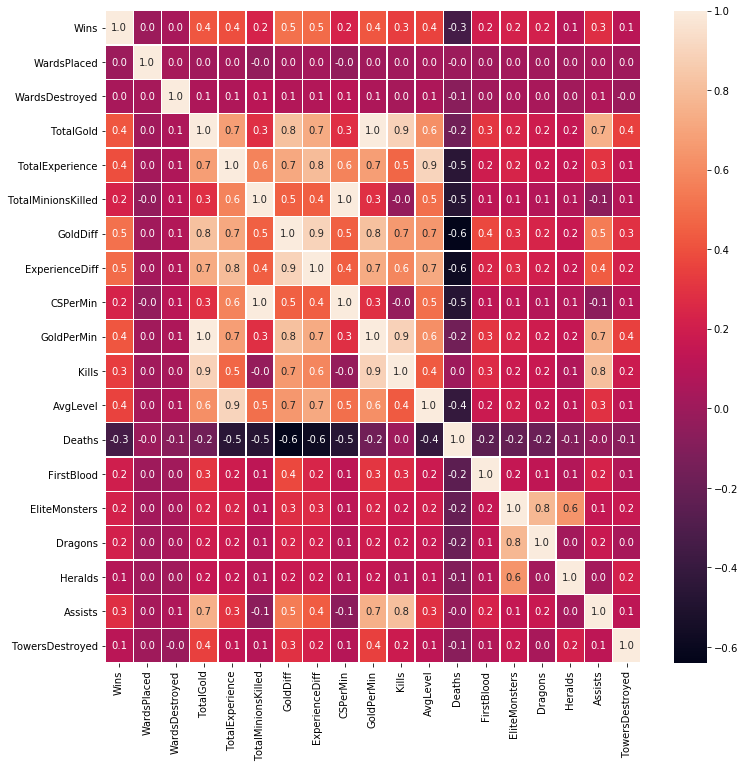

In [11]:
corr_list=["Wins","WardsPlaced","WardsDestroyed","TotalGold","TotalExperience","TotalMinionsKilled","GoldDiff","ExperienceDiff","CSPerMin","GoldPerMin","Kills","AvgLevel","Deaths","FirstBlood","EliteMonsters","Dragons","Heralds","Assists","TowersDestroyed"]

f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(blue_data[corr_list].corr(),annot=True,linewidths=.5,fmt=".1f",ax=ax)
plt.show()

<a id="10"></a><br>
## Wins -- Kills

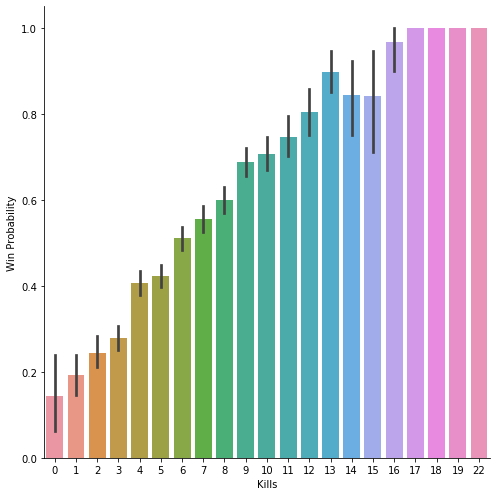

In [12]:
g = sns.factorplot(x="Kills",y="Wins", data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

* From this graph we can say that for a player who had 12 or more kills has really high chance to win.
* The player with between 6 and 12 kills player has nearly same cahnce to win and lose.
* The others are most probably lost their games.

<a id="11"></a><br>
## Wins -- AvgLevel

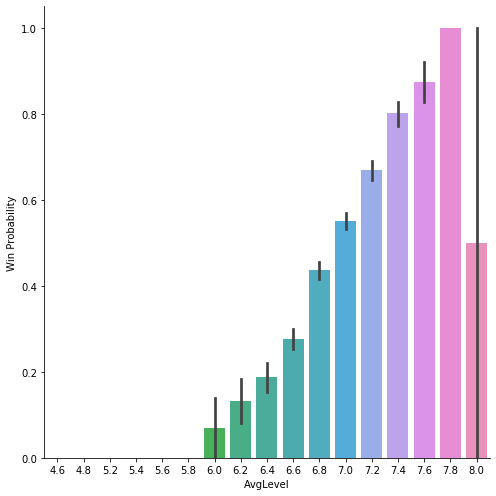

In [13]:
g = sns.factorplot(x="AvgLevel",y="Wins", data=blue_data, kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

* From this graph we can say that if the average level is higher than 7.2 they have more cahnce to others.

<a id="12"></a><br>
## Wins -- Deaths

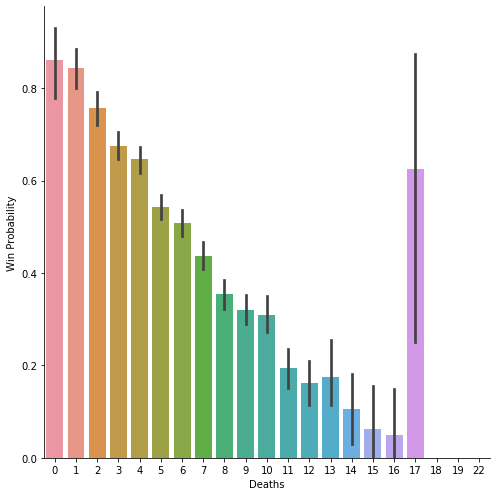

In [14]:
g = sns.factorplot(x="Deaths",y="Wins", data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

* According to graph we can say that a player with 4 or less has more chance to win a ranked game.

<a id="13"></a><br>
## Wins -- FirstBlood

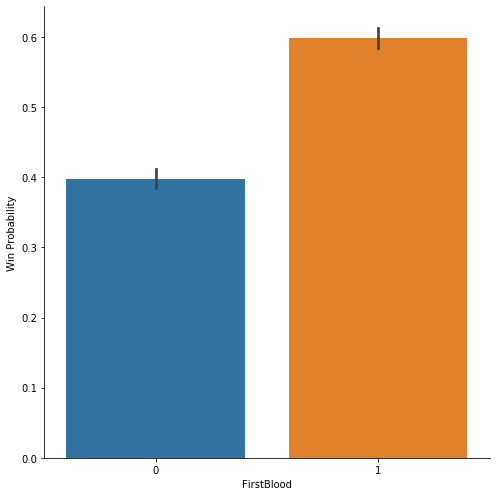

In [15]:
g = sns.factorplot(x="FirstBlood",y="Wins", data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

* In this kinda situations there is just 2 probability. If we look at the graph we can see that if the player have taken the first blood player has more chance to win.

<a id="14"></a><br>
## Wins -- EliteMonsters

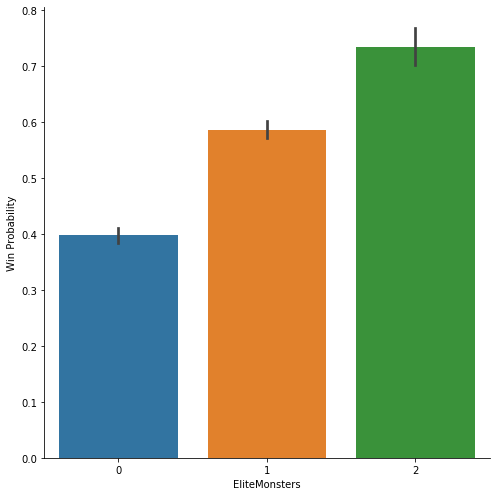

In [16]:
g = sns.factorplot(x="EliteMonsters",y="Wins",data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

* According to the graph we can say that if you kill more elite monsters you have higher chance to win.

<a id="15"></a><br>
## Wins -- Dragons

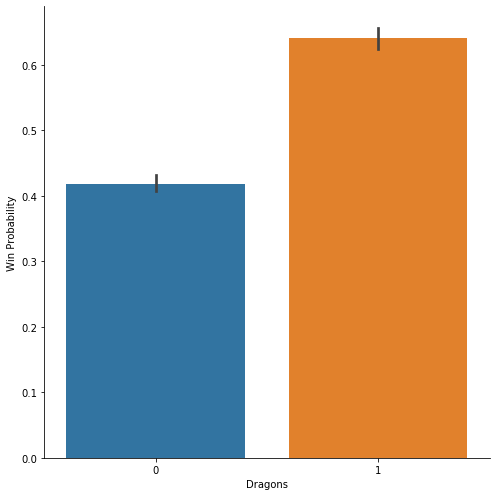

In [17]:
g = sns.factorplot(x="Dragons",y="Wins",data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

* As we expected from the past graph killing more dragons makes you closer to being a winner.

<a id="16"></a><br>
## Wins -- Heralds

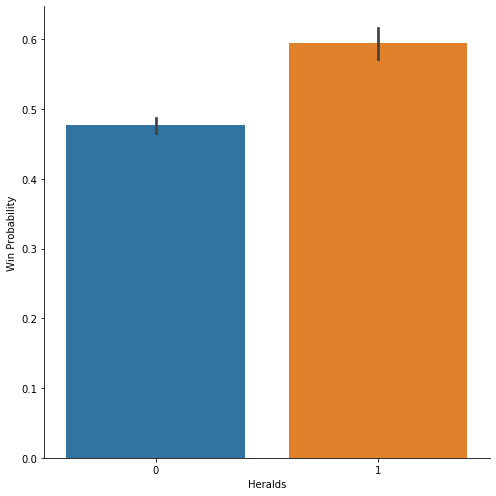

In [18]:
g = sns.factorplot(x="Heralds",y="Wins",data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

* The explanaton that I did in Wins -- Dragons part is also applies for this part. 

<a id="17"></a><br>
## Wins -- Assists

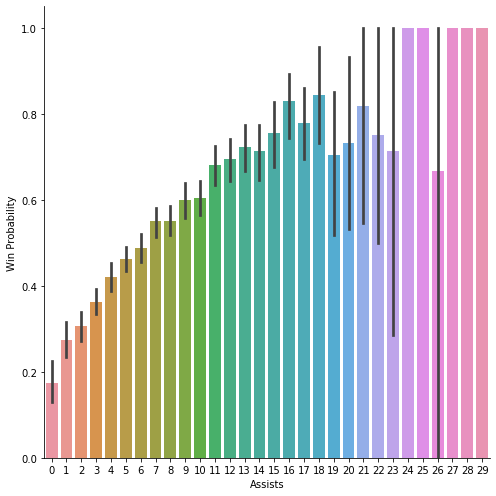

In [19]:
g = sns.factorplot(x="Assists",y="Wins",data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

* If the player's assists are greater or equal to 15 has more chance to other situations.
* If the player's assists are between 7 and 15 has nearly same chance to win or lose.
* The last probability has more chance to lose than win.

<a id="18"></a><br>
## Wins -- TowersDestroyed

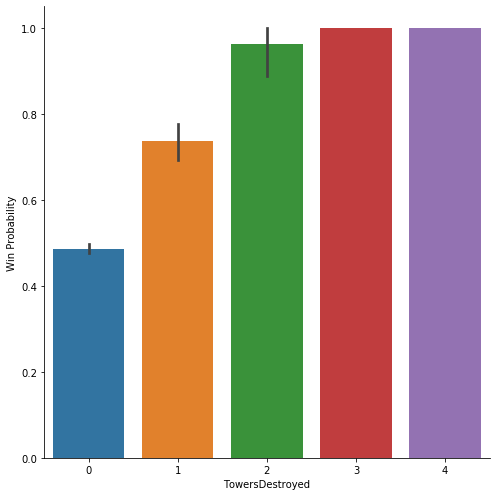

In [20]:
g = sns.factorplot(x="TowersDestroyed",y="Wins",data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

* From the graph we can say that the more you destroy tower the more you ave chance to win.

<a id="19"></a><br>
## Wins -- RoundedCSPerMin

In [21]:
blue_data["RoundedCSPerMin"]=np.round(blue_data["CSPerMin"])

In this part I wanted to say that I firstly looked at graphs of TotalMinionsKilled and TotalJungleMinionsKilled and after that I saw classifiaction is really hard because of the variation of the numbers. Then I decided to look CSPerMin. "CS" is shorthand for "Creep Score", and is the number of creeps (neutral jungle creeps or the enemy's creeps) that you have scored the last hit on and obtained gold from. After look at te CSPerMin I saw same problem with others but after that I thought that I can round it and then use it.

CS information from: https://gaming.stackexchange.com/questions/58190/what-does-cs-mean-and-how-do-you-increase-it-the-best-you-can

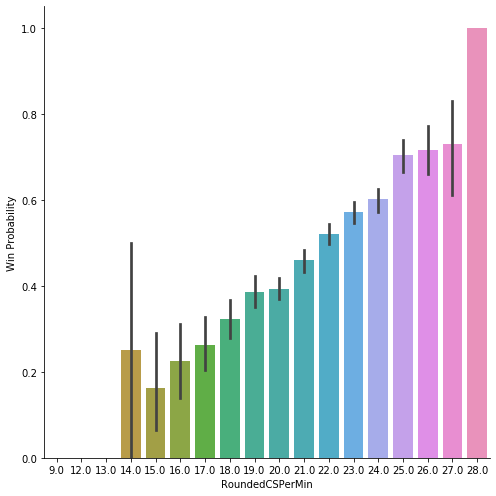

In [22]:
g = sns.factorplot(x="RoundedCSPerMin",y="Wins",data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

* According to the graph we can say that if your creep score is 25 or higher you have really more cahce to others.

<a id="20"></a><br>
## Wins -- WardsPlaced

Actually if we looked at the heatmap we can see that there is no correlation between Wins and Wardsplaced. But as I said in the introduction part I think that wards are one of the most important part of a LoL game. Because of that I wanted to examine. For examining I looked at it in 5 parts.

In [23]:
print("max:",np.max(blue_data.WardsPlaced),"min:",np.min(blue_data.WardsPlaced))

max: 250 min: 5


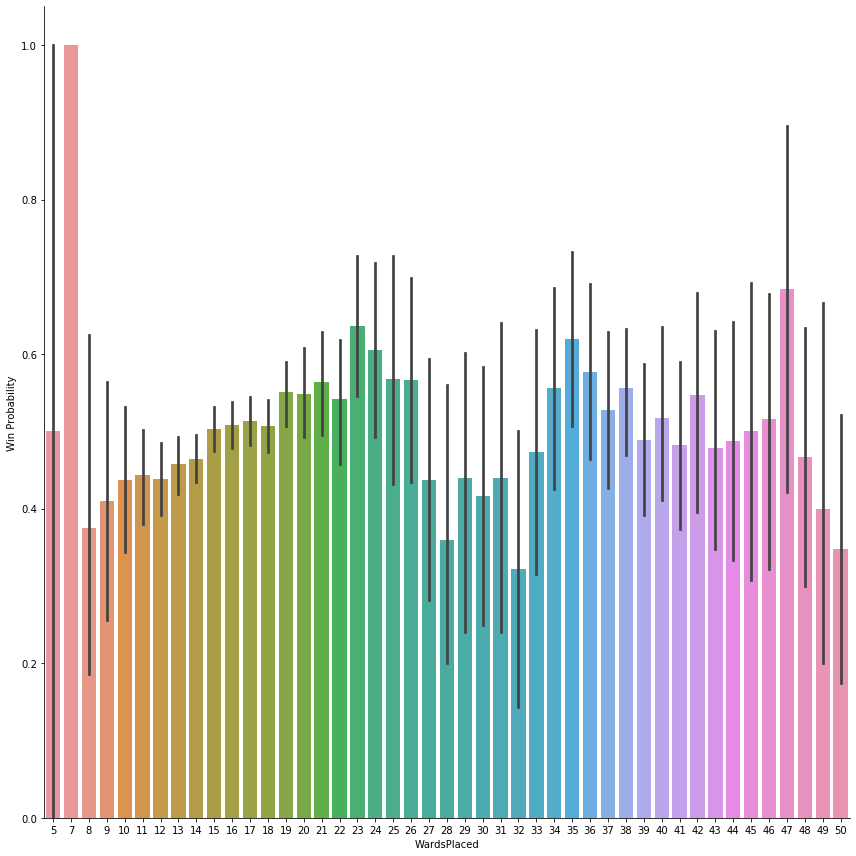

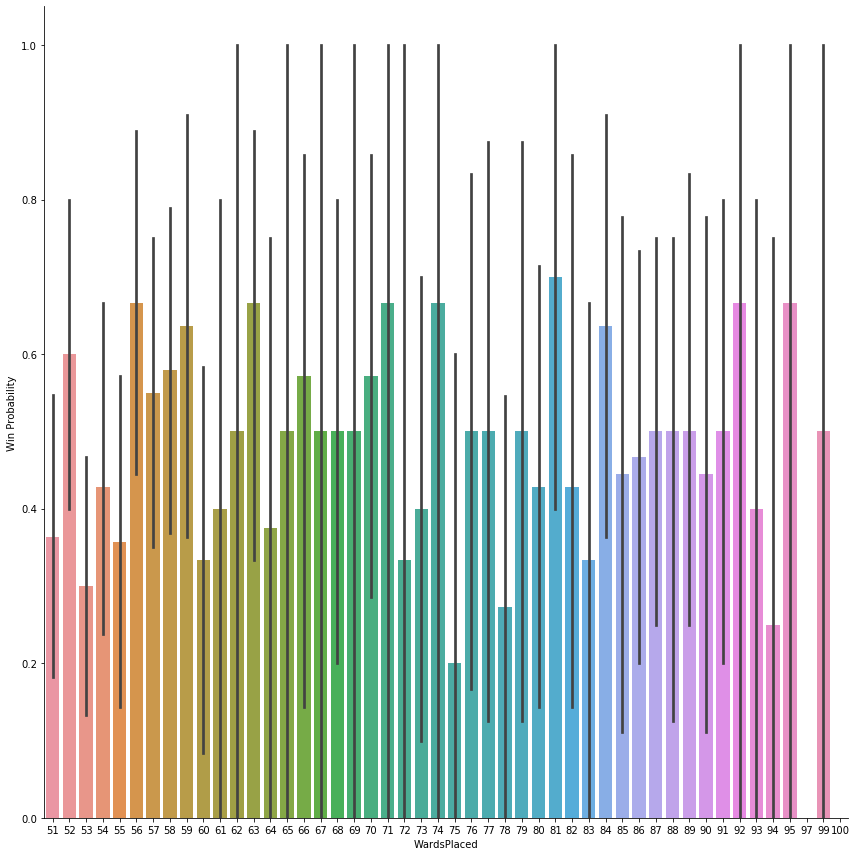

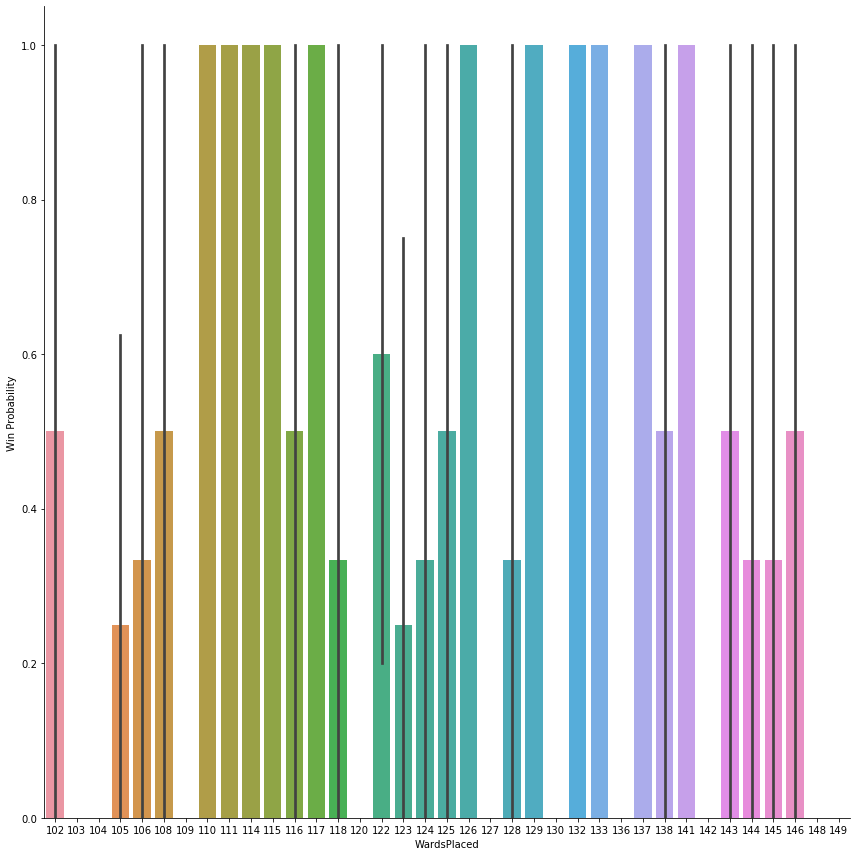

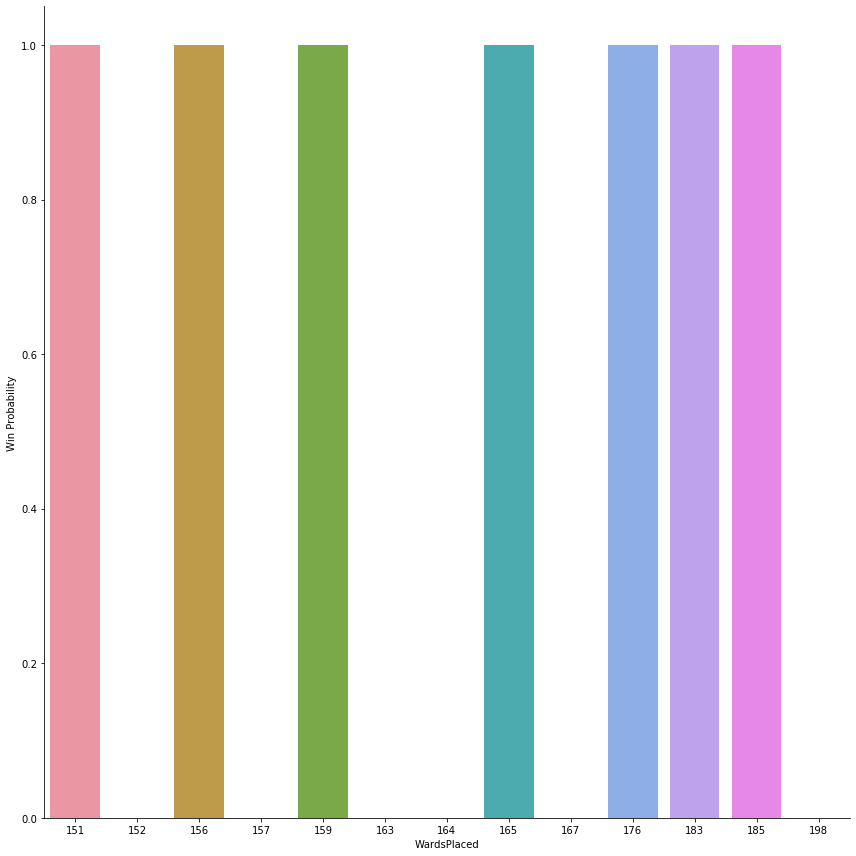

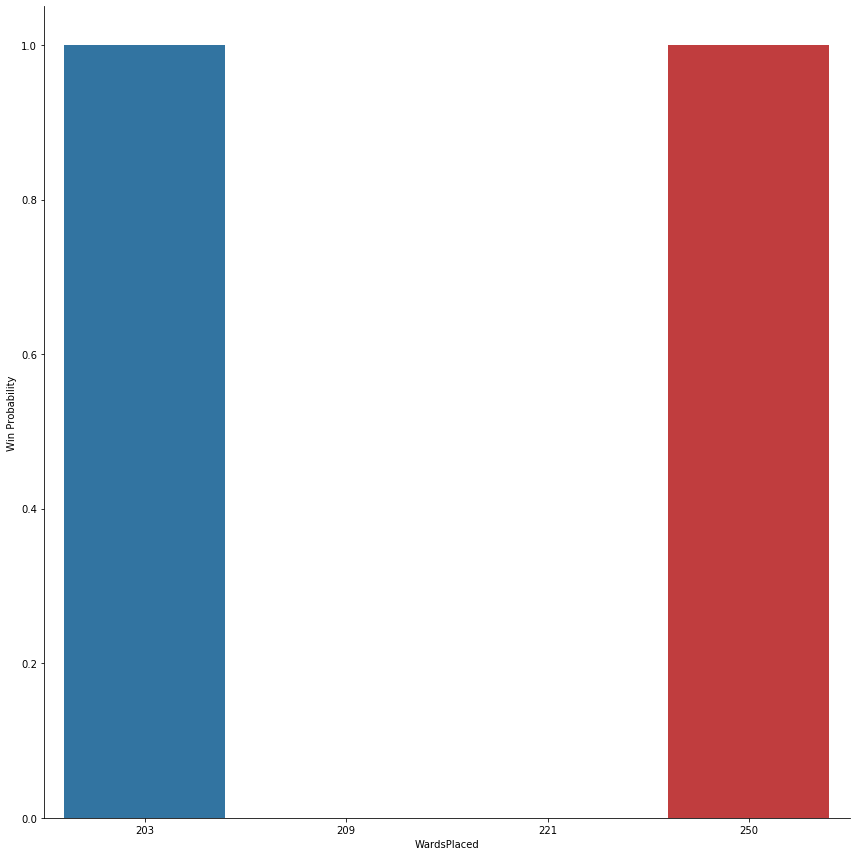

In [24]:
i=0
while i<5:
    data1=blue_data[blue_data.WardsPlaced<=(i+1)*50]
    data2=data1[data1.WardsPlaced>i*50]
    g=sns.factorplot(x="WardsPlaced",y="Wins",data=data2,kind="bar",height=12)
    g.set_ylabels("Win Probability")
    plt.show()
    i=i+1



<a id="21"></a><br>
## Wins -- WardsDestroyed

In [25]:
print("max:",np.max(blue_data.WardsDestroyed),"min:",np.min(blue_data.WardsDestroyed))

max: 27 min: 0


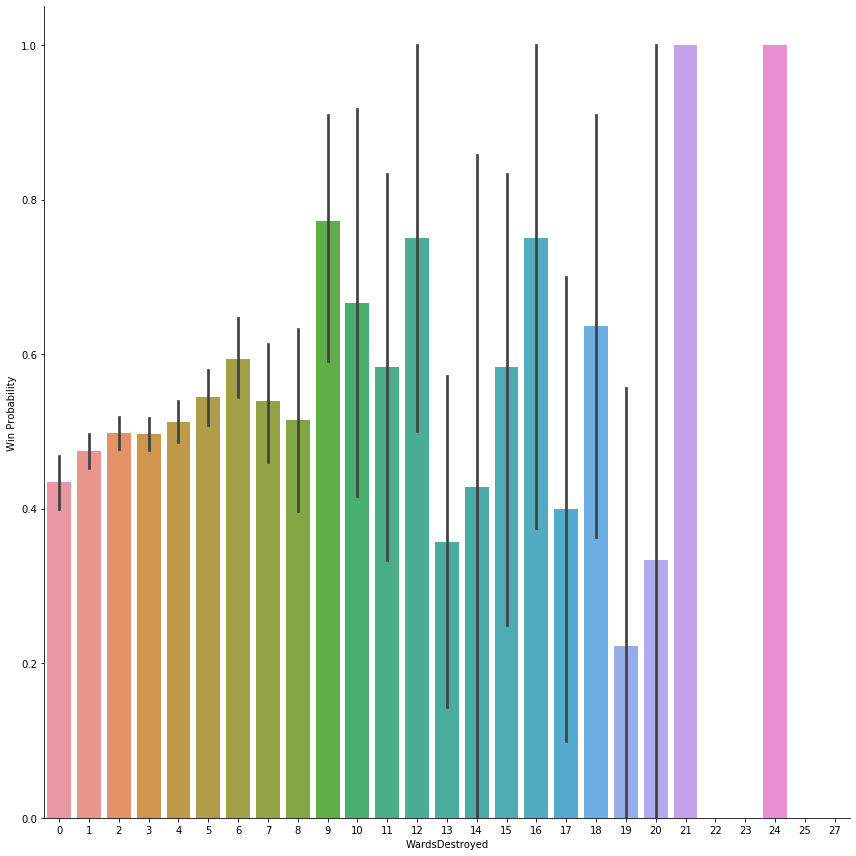

In [26]:
g=sns.factorplot(x="WardsDestroyed",y="Wins",data=blue_data,kind="bar",height=12)
g.set_ylabels("Win Probability")
plt.show()

This markdown is for WardsPlaced and WardsDestroyed part:
* After I looked their graphs I also decided that win rates are randomly scatterd into the data. Because of that I decided to drop this par tin [Drop Other Elements](#4) part.

<a id="22"></a><br>
## Wins -- TotalGold

After this part I have the same problem with wards part and I classified them according to their average values.

In [27]:
print(np.mean(blue_data.TotalGold))


16503.455511691467


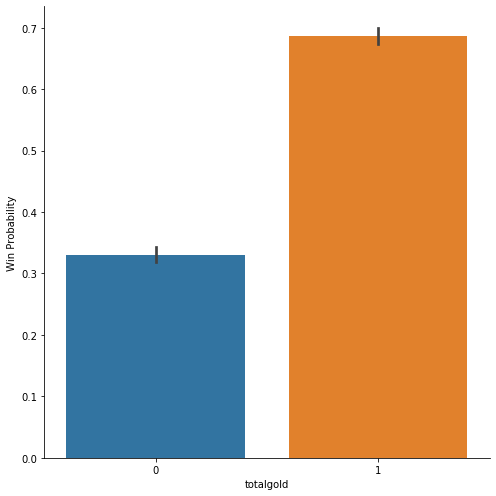

In [28]:
liste=[1 if each>=16503 else 0 for each in blue_data.TotalGold]
blue_data["totalgold"]=liste
g=sns.factorplot(x="totalgold",y="Wins",data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

<a id="23"></a><br>
## Wins -- TotalExperience

In [29]:
print("mean:",np.mean(blue_data.TotalExperience),"max:",np.max(blue_data.TotalExperience),"min:",np.min(blue_data.TotalExperience))


mean: 17928.110132604514 max: 22224 min: 10098


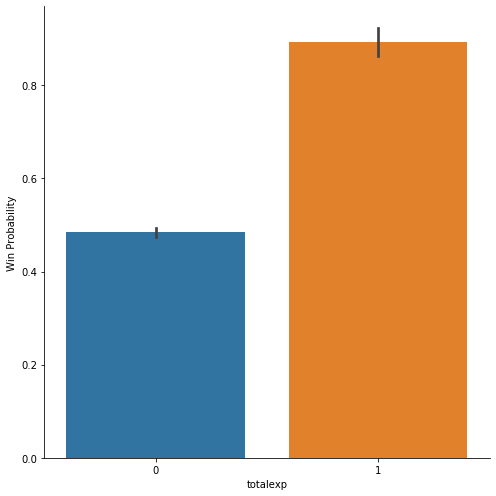

In [30]:
liste=[1 if each>=20000 else 0 for each in blue_data.TotalExperience]
blue_data["totalexp"]=liste
g=sns.factorplot(x="totalexp",y="Wins",data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

<a id="24"></a><br>
## Wins -- GoldPerMin

In [31]:
print("mean:",np.mean(blue_data.GoldPerMin),"max:",np.max(blue_data.GoldPerMin),"min:",np.min(blue_data.GoldPerMin))

mean: 1650.3455511691448 max: 2370.1 min: 1073.0


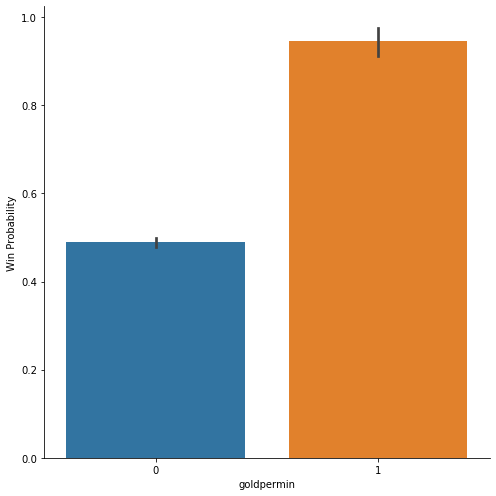

In [32]:
liste=[1 if each>=2000 else 0 for each in blue_data.GoldPerMin]
blue_data["goldpermin"]=liste
g=sns.factorplot(x="goldpermin",y="Wins",data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

<a id="25"></a><br>
## Wins -- ExperienceDiff

In [33]:
print("mean:",np.mean(blue_data.ExperienceDiff),"max:",np.max(blue_data.ExperienceDiff),"min:",np.min(blue_data.ExperienceDiff))

mean: -33.62030569895738 max: 8348 min: -9333


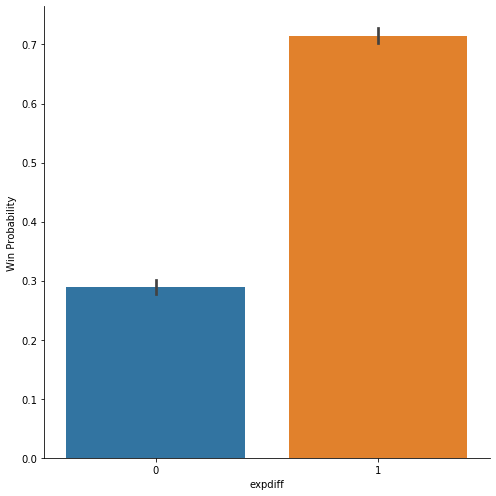

In [34]:
liste=[1 if each>=0 else 0 for each in blue_data.ExperienceDiff]
blue_data["expdiff"]=liste
g=sns.factorplot(x="expdiff",y="Wins",data=blue_data,kind="bar",height=7)
g.set_ylabels("Win Probability")
plt.show()

<a id="40"></a><br>
# Outlier Detection

In [35]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3= np.percentile(df[c],75)
        # IQR
        IQR= Q3-Q1
        # Outlier step
        outlier_step=IQR*1.5
        #detect outliers and their indices
        outlier_list_col=df[(df[c]<Q1-outlier_step) |( df[c]>Q3+outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(i for i, v in outlier_indices.items() if v>2)
    
    return multiple_outliers

In [36]:
blue_data.loc[detect_outliers(blue_data,["Kills","AvgLevel","Deaths","FirstBlood","EliteMonsters","Dragons","Heralds","Assists","TowersDestroyed","RoundedCSPerMin","totalgold","totalexp","goldpermin","expdiff"])]

,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Kills,Deaths,Assists,EliteMonsters,Dragons,Heralds,...,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,GoldPerMin,RoundedCSPerMin,totalgold,totalexp,goldpermin,expdiff
603,1,13,2,1,16,5,16,1,0,1,...,36,5330,4040,23.0,2038.0,23.0,1,1,1,1
639,1,11,4,1,18,13,6,0,0,0,...,44,2658,2407,23.6,2113.2,24.0,1,0,1,1
767,1,16,5,1,17,10,25,0,0,0,...,52,6790,5348,23.9,2333.5,24.0,1,1,1,1
818,1,21,3,0,15,16,10,2,1,1,...,44,-1709,-1585,20.5,1924.7,20.0,1,0,0,0
1224,1,17,2,0,17,9,19,0,0,0,...,43,2828,1962,20.5,2061.9,20.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,1,16,3,1,13,1,15,1,1,0,...,58,8450,6098,23.0,2217.7,23.0,1,1,1,1
4668,1,15,3,1,13,9,13,1,1,0,...,84,4612,2877,22.7,2190.8,23.0,1,1,1,1
4969,1,15,2,1,11,4,7,1,1,0,...,57,6529,4484,23.3,2054.3,23.0,1,1,1,1
8245,1,17,6,1,13,0,14,1,1,0,...,48,6770,4384,21.9,2009.5,22.0,1,1,1,1


In [37]:
blue_data=blue_data.drop(detect_outliers(blue_data,["Kills","AvgLevel","Deaths","FirstBlood","EliteMonsters","Dragons","Heralds","Assists","TowersDestroyed","RoundedCSPerMin","totalgold","totalexp","goldpermin","expdiff"]),axis=0).reset_index(drop = True)

<a id="3"></a><br>
# Feature Engineering

<a id="26"></a><br>
## Wins -- Kills

In [38]:
blue_data.Kills=[2 if i>=12 else 1 if i>=6 and i<12 else 0 for i in blue_data.Kills]

In [39]:
blue_data.Kills.unique()

array([1, 0, 2])

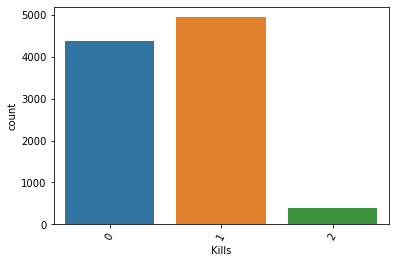

In [40]:
sns.countplot(x="Kills",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [41]:
blue_data=pd.get_dummies(blue_data,columns=["Kills"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Deaths,Assists,EliteMonsters,Dragons,Heralds,TowersDestroyed,...,CSPerMin,GoldPerMin,RoundedCSPerMin,totalgold,totalexp,goldpermin,expdiff,Kills_0,Kills_1,Kills_2
0,0,28,2,1,6,11,0,0,0,0,...,19.5,1721.0,20.0,1,0,0,0,0,1,0
1,0,12,1,0,5,5,0,0,0,0,...,17.4,1471.2,17.0,0,0,0,0,1,0,0
2,0,15,0,0,11,4,1,1,0,0,...,18.6,1611.3,19.0,0,0,0,0,0,1,0
3,0,43,1,0,5,5,1,0,1,0,...,20.1,1515.7,20.0,0,0,0,0,1,0,0
4,0,75,4,0,6,6,0,0,0,0,...,21.0,1640.0,21.0,0,0,0,1,0,1,0


<a id="27"></a><br>
## Wins -- AvgLevel

In [42]:
blue_data.AvgLevel=[1 if i>=7.2 else 0 for i in blue_data.AvgLevel]

In [43]:
blue_data.AvgLevel.unique()

array([0, 1])

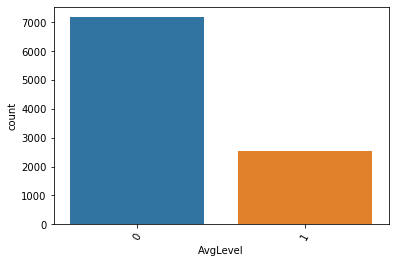

In [44]:
sns.countplot(x="AvgLevel",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [45]:
blue_data=pd.get_dummies(blue_data,columns=["AvgLevel"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Deaths,Assists,EliteMonsters,Dragons,Heralds,TowersDestroyed,...,RoundedCSPerMin,totalgold,totalexp,goldpermin,expdiff,Kills_0,Kills_1,Kills_2,AvgLevel_0,AvgLevel_1
0,0,28,2,1,6,11,0,0,0,0,...,20.0,1,0,0,0,0,1,0,1,0
1,0,12,1,0,5,5,0,0,0,0,...,17.0,0,0,0,0,1,0,0,1,0
2,0,15,0,0,11,4,1,1,0,0,...,19.0,0,0,0,0,0,1,0,1,0
3,0,43,1,0,5,5,1,0,1,0,...,20.0,0,0,0,0,1,0,0,1,0
4,0,75,4,0,6,6,0,0,0,0,...,21.0,0,0,0,1,0,1,0,1,0


<a id="28"></a><br>
## Wins -- Deaths

In [46]:
blue_data.Deaths=[1 if i<5 else 0 for i in blue_data.Deaths]

In [47]:
blue_data.Deaths.unique()

array([0, 1])

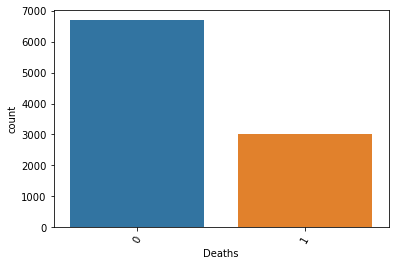

In [48]:
sns.countplot(x="Deaths",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [49]:
blue_data=pd.get_dummies(blue_data,columns=["Deaths"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,FirstBlood,Assists,EliteMonsters,Dragons,Heralds,TowersDestroyed,TotalGold,...,totalexp,goldpermin,expdiff,Kills_0,Kills_1,Kills_2,AvgLevel_0,AvgLevel_1,Deaths_0,Deaths_1
0,0,28,2,1,11,0,0,0,0,17210,...,0,0,0,0,1,0,1,0,1,0
1,0,12,1,0,5,0,0,0,0,14712,...,0,0,0,1,0,0,1,0,1,0
2,0,15,0,0,4,1,1,0,0,16113,...,0,0,0,0,1,0,1,0,1,0
3,0,43,1,0,5,1,0,1,0,15157,...,0,0,0,1,0,0,1,0,1,0
4,0,75,4,0,6,0,0,0,0,16400,...,0,0,1,0,1,0,1,0,1,0


<a id="29"></a><br>
## Wins -- FirstBlood

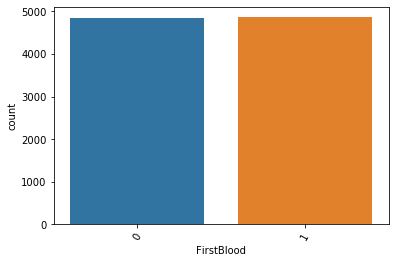

In [50]:
sns.countplot(x="FirstBlood",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [51]:
blue_data=pd.get_dummies(blue_data,columns=["FirstBlood"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,Assists,EliteMonsters,Dragons,Heralds,TowersDestroyed,TotalGold,TotalExperience,...,expdiff,Kills_0,Kills_1,Kills_2,AvgLevel_0,AvgLevel_1,Deaths_0,Deaths_1,FirstBlood_0,FirstBlood_1
0,0,28,2,11,0,0,0,0,17210,17039,...,0,0,1,0,1,0,1,0,0,1
1,0,12,1,5,0,0,0,0,14712,16265,...,0,1,0,0,1,0,1,0,1,0
2,0,15,0,4,1,1,0,0,16113,16221,...,0,0,1,0,1,0,1,0,1,0
3,0,43,1,5,1,0,1,0,15157,17954,...,0,1,0,0,1,0,1,0,1,0
4,0,75,4,6,0,0,0,0,16400,18543,...,1,0,1,0,1,0,1,0,1,0


<a id="30"></a><br>
## Wins -- EliteMonsters

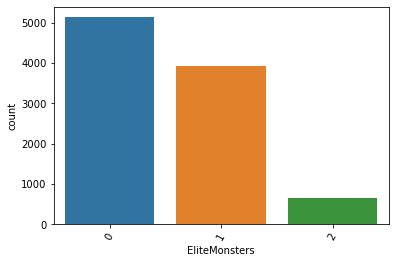

In [52]:
sns.countplot(x="EliteMonsters",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [53]:
blue_data=pd.get_dummies(blue_data,columns=["EliteMonsters"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,Assists,Dragons,Heralds,TowersDestroyed,TotalGold,TotalExperience,TotalMinionsKilled,...,Kills_2,AvgLevel_0,AvgLevel_1,Deaths_0,Deaths_1,FirstBlood_0,FirstBlood_1,EliteMonsters_0,EliteMonsters_1,EliteMonsters_2
0,0,28,2,11,0,0,0,17210,17039,195,...,0,1,0,1,0,0,1,1,0,0
1,0,12,1,5,0,0,0,14712,16265,174,...,0,1,0,1,0,1,0,1,0,0
2,0,15,0,4,1,0,0,16113,16221,186,...,0,1,0,1,0,1,0,0,1,0
3,0,43,1,5,0,1,0,15157,17954,201,...,0,1,0,1,0,1,0,0,1,0
4,0,75,4,6,0,0,0,16400,18543,210,...,0,1,0,1,0,1,0,1,0,0


<a id="31"></a><br>
## Wins -- Dragons

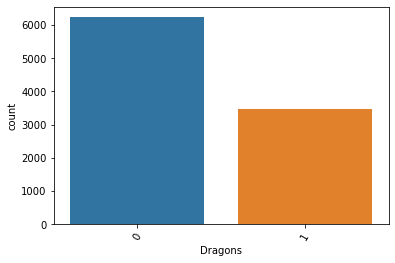

In [54]:
sns.countplot(x="Dragons",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [55]:
blue_data=pd.get_dummies(blue_data,columns=["Dragons"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,Assists,Heralds,TowersDestroyed,TotalGold,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,...,AvgLevel_1,Deaths_0,Deaths_1,FirstBlood_0,FirstBlood_1,EliteMonsters_0,EliteMonsters_1,EliteMonsters_2,Dragons_0,Dragons_1
0,0,28,2,11,0,0,17210,17039,195,36,...,0,1,0,0,1,1,0,0,1,0
1,0,12,1,5,0,0,14712,16265,174,43,...,0,1,0,1,0,1,0,0,1,0
2,0,15,0,4,0,0,16113,16221,186,46,...,0,1,0,1,0,0,1,0,0,1
3,0,43,1,5,1,0,15157,17954,201,55,...,0,1,0,1,0,0,1,0,1,0
4,0,75,4,6,0,0,16400,18543,210,57,...,0,1,0,1,0,1,0,0,1,0


<a id="32"></a><br>
## Wins -- Heralds

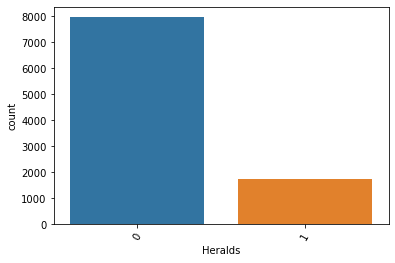

In [56]:
sns.countplot(x="Heralds",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [57]:
blue_data=pd.get_dummies(blue_data,columns=["Heralds"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,Assists,TowersDestroyed,TotalGold,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,...,Deaths_1,FirstBlood_0,FirstBlood_1,EliteMonsters_0,EliteMonsters_1,EliteMonsters_2,Dragons_0,Dragons_1,Heralds_0,Heralds_1
0,0,28,2,11,0,17210,17039,195,36,643,...,0,0,1,1,0,0,1,0,1,0
1,0,12,1,5,0,14712,16265,174,43,-2908,...,0,1,0,1,0,0,1,0,1,0
2,0,15,0,4,0,16113,16221,186,46,-1172,...,0,1,0,0,1,0,0,1,1,0
3,0,43,1,5,0,15157,17954,201,55,-1321,...,0,1,0,0,1,0,1,0,0,1
4,0,75,4,6,0,16400,18543,210,57,-1004,...,0,1,0,1,0,0,1,0,1,0


<a id="33"></a><br>
## Wins -- Assists

In [58]:
blue_data.Assists=[1 if i>=6 and i<15 else 2 if i>=15 else 0 for i in blue_data.Assists]

In [59]:
blue_data.Assists.unique()

array([1, 0, 2])

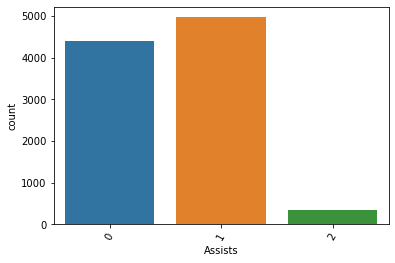

In [60]:
sns.countplot(x="Assists",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [61]:
blue_data=pd.get_dummies(blue_data,columns=["Assists"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,TowersDestroyed,TotalGold,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,...,EliteMonsters_0,EliteMonsters_1,EliteMonsters_2,Dragons_0,Dragons_1,Heralds_0,Heralds_1,Assists_0,Assists_1,Assists_2
0,0,28,2,0,17210,17039,195,36,643,-8,...,1,0,0,1,0,1,0,0,1,0
1,0,12,1,0,14712,16265,174,43,-2908,-1173,...,1,0,0,1,0,1,0,1,0,0
2,0,15,0,0,16113,16221,186,46,-1172,-1033,...,0,1,0,0,1,1,0,1,0,0
3,0,43,1,0,15157,17954,201,55,-1321,-7,...,0,1,0,1,0,0,1,1,0,0
4,0,75,4,0,16400,18543,210,57,-1004,230,...,1,0,0,1,0,1,0,0,1,0


<a id="34"></a><br>
## Wins -- TowersDestroyed

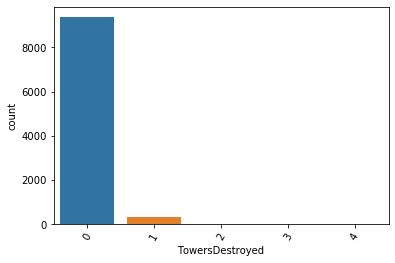

In [62]:
sns.countplot(x="TowersDestroyed",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [63]:
blue_data=pd.get_dummies(blue_data,columns=["TowersDestroyed"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,TotalGold,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,...,Heralds_0,Heralds_1,Assists_0,Assists_1,Assists_2,TowersDestroyed_0,TowersDestroyed_1,TowersDestroyed_2,TowersDestroyed_3,TowersDestroyed_4
0,0,28,2,17210,17039,195,36,643,-8,19.5,...,1,0,0,1,0,1,0,0,0,0
1,0,12,1,14712,16265,174,43,-2908,-1173,17.4,...,1,0,1,0,0,1,0,0,0,0
2,0,15,0,16113,16221,186,46,-1172,-1033,18.6,...,1,0,1,0,0,1,0,0,0,0
3,0,43,1,15157,17954,201,55,-1321,-7,20.1,...,0,1,1,0,0,1,0,0,0,0
4,0,75,4,16400,18543,210,57,-1004,230,21.0,...,1,0,0,1,0,1,0,0,0,0


<a id="35"></a><br>
## Wins -- RoundedCSPerMin

In [64]:
blue_data.RoundedCSPerMin=[1 if i>=24 else 0 for i in blue_data.RoundedCSPerMin]

In [65]:
blue_data.RoundedCSPerMin.unique()

array([0, 1])

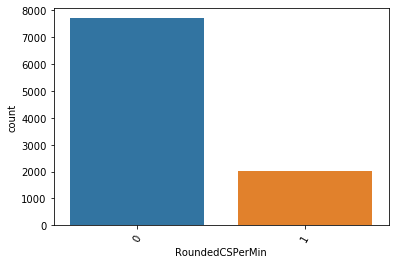

In [66]:
sns.countplot(x="RoundedCSPerMin",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [67]:
blue_data=pd.get_dummies(blue_data,columns=["RoundedCSPerMin"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,TotalGold,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,...,Assists_0,Assists_1,Assists_2,TowersDestroyed_0,TowersDestroyed_1,TowersDestroyed_2,TowersDestroyed_3,TowersDestroyed_4,RoundedCSPerMin_0,RoundedCSPerMin_1
0,0,28,2,17210,17039,195,36,643,-8,19.5,...,0,1,0,1,0,0,0,0,1,0
1,0,12,1,14712,16265,174,43,-2908,-1173,17.4,...,1,0,0,1,0,0,0,0,1,0
2,0,15,0,16113,16221,186,46,-1172,-1033,18.6,...,1,0,0,1,0,0,0,0,1,0
3,0,43,1,15157,17954,201,55,-1321,-7,20.1,...,1,0,0,1,0,0,0,0,1,0
4,0,75,4,16400,18543,210,57,-1004,230,21.0,...,0,1,0,1,0,0,0,0,1,0


<a id="36"></a><br>
## Wins -- TotalGold

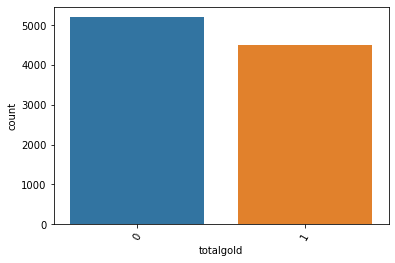

In [68]:
sns.countplot(x="totalgold",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [69]:
blue_data=pd.get_dummies(blue_data,columns=["totalgold"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,TotalGold,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,...,Assists_2,TowersDestroyed_0,TowersDestroyed_1,TowersDestroyed_2,TowersDestroyed_3,TowersDestroyed_4,RoundedCSPerMin_0,RoundedCSPerMin_1,totalgold_0,totalgold_1
0,0,28,2,17210,17039,195,36,643,-8,19.5,...,0,1,0,0,0,0,1,0,0,1
1,0,12,1,14712,16265,174,43,-2908,-1173,17.4,...,0,1,0,0,0,0,1,0,1,0
2,0,15,0,16113,16221,186,46,-1172,-1033,18.6,...,0,1,0,0,0,0,1,0,1,0
3,0,43,1,15157,17954,201,55,-1321,-7,20.1,...,0,1,0,0,0,0,1,0,1,0
4,0,75,4,16400,18543,210,57,-1004,230,21.0,...,0,1,0,0,0,0,1,0,1,0


<a id="37"></a><br>
## Wins -- TotalExperience

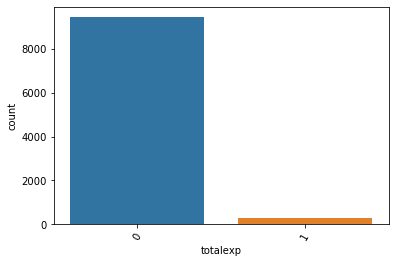

In [70]:
sns.countplot(x="totalexp",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [71]:
blue_data=pd.get_dummies(blue_data,columns=["totalexp"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,TotalGold,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,...,TowersDestroyed_1,TowersDestroyed_2,TowersDestroyed_3,TowersDestroyed_4,RoundedCSPerMin_0,RoundedCSPerMin_1,totalgold_0,totalgold_1,totalexp_0,totalexp_1
0,0,28,2,17210,17039,195,36,643,-8,19.5,...,0,0,0,0,1,0,0,1,1,0
1,0,12,1,14712,16265,174,43,-2908,-1173,17.4,...,0,0,0,0,1,0,1,0,1,0
2,0,15,0,16113,16221,186,46,-1172,-1033,18.6,...,0,0,0,0,1,0,1,0,1,0
3,0,43,1,15157,17954,201,55,-1321,-7,20.1,...,0,0,0,0,1,0,1,0,1,0
4,0,75,4,16400,18543,210,57,-1004,230,21.0,...,0,0,0,0,1,0,1,0,1,0


<a id="38"></a><br>
## Wins -- GoldPerMin

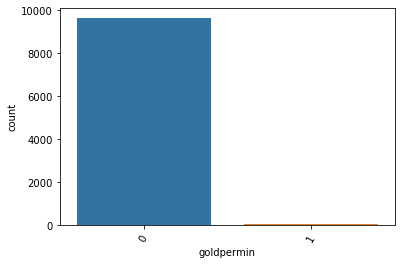

In [72]:
sns.countplot(x="goldpermin",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [73]:
blue_data=pd.get_dummies(blue_data,columns=["goldpermin"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,TotalGold,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,...,TowersDestroyed_3,TowersDestroyed_4,RoundedCSPerMin_0,RoundedCSPerMin_1,totalgold_0,totalgold_1,totalexp_0,totalexp_1,goldpermin_0,goldpermin_1
0,0,28,2,17210,17039,195,36,643,-8,19.5,...,0,0,1,0,0,1,1,0,1,0
1,0,12,1,14712,16265,174,43,-2908,-1173,17.4,...,0,0,1,0,1,0,1,0,1,0
2,0,15,0,16113,16221,186,46,-1172,-1033,18.6,...,0,0,1,0,1,0,1,0,1,0
3,0,43,1,15157,17954,201,55,-1321,-7,20.1,...,0,0,1,0,1,0,1,0,1,0
4,0,75,4,16400,18543,210,57,-1004,230,21.0,...,0,0,1,0,1,0,1,0,1,0


<a id="39"></a><br>
## Wins -- ExperienceDiff

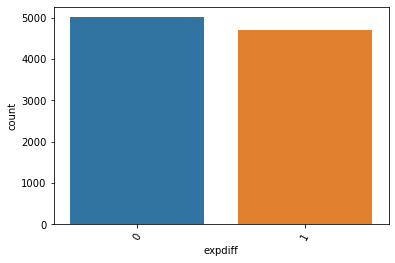

In [74]:
sns.countplot(x="expdiff",data=blue_data)
plt.xticks(rotation=60)
plt.show()

In [75]:
blue_data=pd.get_dummies(blue_data,columns=["expdiff"])
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,TotalGold,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,...,RoundedCSPerMin_0,RoundedCSPerMin_1,totalgold_0,totalgold_1,totalexp_0,totalexp_1,goldpermin_0,goldpermin_1,expdiff_0,expdiff_1
0,0,28,2,17210,17039,195,36,643,-8,19.5,...,1,0,0,1,1,0,1,0,1,0
1,0,12,1,14712,16265,174,43,-2908,-1173,17.4,...,1,0,1,0,1,0,1,0,1,0
2,0,15,0,16113,16221,186,46,-1172,-1033,18.6,...,1,0,1,0,1,0,1,0,1,0
3,0,43,1,15157,17954,201,55,-1321,-7,20.1,...,1,0,1,0,1,0,1,0,1,0
4,0,75,4,16400,18543,210,57,-1004,230,21.0,...,1,0,1,0,1,0,1,0,0,1


<a id="4"></a><br>
# Drop Other Elements

In [76]:
blue_data.columns

Index(['Wins', 'WardsPlaced', 'WardsDestroyed', 'TotalGold', 'TotalExperience',
       'TotalMinionsKilled', 'TotalJungleMinionsKilled', 'GoldDiff',
       'ExperienceDiff', 'CSPerMin', 'GoldPerMin', 'Kills_0', 'Kills_1',
       'Kills_2', 'AvgLevel_0', 'AvgLevel_1', 'Deaths_0', 'Deaths_1',
       'FirstBlood_0', 'FirstBlood_1', 'EliteMonsters_0', 'EliteMonsters_1',
       'EliteMonsters_2', 'Dragons_0', 'Dragons_1', 'Heralds_0', 'Heralds_1',
       'Assists_0', 'Assists_1', 'Assists_2', 'TowersDestroyed_0',
       'TowersDestroyed_1', 'TowersDestroyed_2', 'TowersDestroyed_3',
       'TowersDestroyed_4', 'RoundedCSPerMin_0', 'RoundedCSPerMin_1',
       'totalgold_0', 'totalgold_1', 'totalexp_0', 'totalexp_1',
       'goldpermin_0', 'goldpermin_1', 'expdiff_0', 'expdiff_1'],
      dtype='object')

In [77]:
blue_data=blue_data.drop(["TotalGold","TotalExperience","TotalMinionsKilled","TotalJungleMinionsKilled","GoldDiff","ExperienceDiff","CSPerMin","GoldPerMin"],axis=1)
blue_data.head()

,Wins,WardsPlaced,WardsDestroyed,Kills_0,Kills_1,Kills_2,AvgLevel_0,AvgLevel_1,Deaths_0,Deaths_1,...,RoundedCSPerMin_0,RoundedCSPerMin_1,totalgold_0,totalgold_1,totalexp_0,totalexp_1,goldpermin_0,goldpermin_1,expdiff_0,expdiff_1
0,0,28,2,0,1,0,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0
1,0,12,1,1,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,0,15,0,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,0,43,1,1,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,0,75,4,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1


In [78]:
blue_data.columns

Index(['Wins', 'WardsPlaced', 'WardsDestroyed', 'Kills_0', 'Kills_1',
       'Kills_2', 'AvgLevel_0', 'AvgLevel_1', 'Deaths_0', 'Deaths_1',
       'FirstBlood_0', 'FirstBlood_1', 'EliteMonsters_0', 'EliteMonsters_1',
       'EliteMonsters_2', 'Dragons_0', 'Dragons_1', 'Heralds_0', 'Heralds_1',
       'Assists_0', 'Assists_1', 'Assists_2', 'TowersDestroyed_0',
       'TowersDestroyed_1', 'TowersDestroyed_2', 'TowersDestroyed_3',
       'TowersDestroyed_4', 'RoundedCSPerMin_0', 'RoundedCSPerMin_1',
       'totalgold_0', 'totalgold_1', 'totalexp_0', 'totalexp_1',
       'goldpermin_0', 'goldpermin_1', 'expdiff_0', 'expdiff_1'],
      dtype='object')

<a id="5"></a><br>
# Modelling

In [79]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id="6"></a><br>
## Train Test Split

In [80]:
length=6000
test=blue_data[length:]
test.drop(["Wins"],axis=1,inplace=True)

In [81]:
test.head()

,WardsPlaced,WardsDestroyed,Kills_0,Kills_1,Kills_2,AvgLevel_0,AvgLevel_1,Deaths_0,Deaths_1,FirstBlood_0,...,RoundedCSPerMin_0,RoundedCSPerMin_1,totalgold_0,totalgold_1,totalexp_0,totalexp_1,goldpermin_0,goldpermin_1,expdiff_0,expdiff_1
6000,41,2,1,0,0,0,1,0,1,1,...,1,0,1,0,1,0,1,0,0,1
6001,17,1,0,1,0,1,0,0,1,0,...,0,1,0,1,1,0,1,0,0,1
6002,40,5,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
6003,12,0,0,1,0,1,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0
6004,15,3,0,1,0,1,0,0,1,1,...,1,0,1,0,1,0,1,0,0,1


In [82]:
train=blue_data[:length]
X_train=train.drop(["Wins"],axis=1)
Y_train=train.Wins

x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=42)
print("x_train:",len(x_train))
print("x_test:",len(x_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))
print("test:",len(test))

x_train: 4200
x_test: 1800
y_train: 4200
y_test: 1800
test: 3718


<a id="7"></a><br>
## Simple Logistic Regression

In [83]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
acc_log_train=round(logreg.score(x_train,y_train)*100,2)
acc_log_test=round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: %{}".format(acc_log_train))
print("Test Accuracy: %{}".format(acc_log_test))

Training Accuracy: %72.21
Test Accuracy: %72.5


<a id="8"></a><br>
## Hyperparameter Tuning -- Grid Search -- Cross Validation

In [84]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [85]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7150000000000001
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  6.2min finished


0.7083333333333334
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.0min finished


0.7166666666666667
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.720952380952381
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.7s


0.6935714285714286


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    9.5s finished


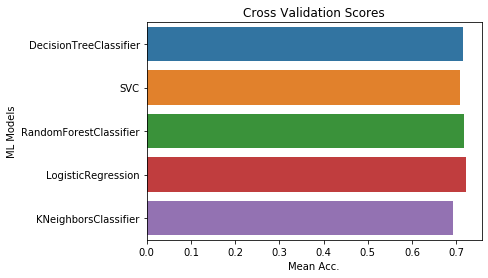

In [86]:
cv_results=pd.DataFrame({"Cross Validation Means":cv_result,"ML Models":["DecisionTreeClassifier","SVC","RandomForestClassifier","LogisticRegression","KNeighborsClassifier"]})

g= sns.barplot("Cross Validation Means","ML Models",data=cv_results)
g.set_xlabel("Mean Acc.")
g.set_title("Cross Validation Scores")
plt.show()

<a id="9"></a><br>
## Ensemble Modelling

In [87]:
votingC=VotingClassifier(estimators=[("dt",best_estimators[0]),
                                    ("rf",best_estimators[2]),
                                    ("lr",best_estimators[3])],
                                    voting="soft",n_jobs=-1)
votingC=votingC.fit(x_train,y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.7188888888888889
